In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
 
dataset = pd.read_excel("C:\HousePricePrediction.xlsx")
print(dataset.head(11))

    Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0    0          60       RL     8450    Inside     1Fam            5   
1    1          20       RL     9600       FR2     1Fam            8   
2    2          60       RL    11250    Inside     1Fam            5   
3    3          70       RL     9550    Corner     1Fam            5   
4    4          60       RL    14260       FR2     1Fam            5   
5    5          50       RL    14115    Inside     1Fam            5   
6    6          20       RL    10084    Inside     1Fam            5   
7    7          60       RL    10382    Corner     1Fam            6   
8    8          50       RM     6120    Inside     1Fam            5   
9    9         190       RL     7420    Corner   2fmCon            6   
10  10          20       RL    11200    Inside     1Fam            5   

    YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0        2003          2003     VinylSd         0.0      

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [135]:
np.random.seed(0)

In [136]:
X = np.random.rand(100, 1) * 10  

In [137]:
y = 2 * X + 3 + np.random.randn(100, 1) * 2

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [139]:
model = LinearRegression()

In [140]:
model.fit(X_train, y_train)

LinearRegression()

In [141]:
y_pred = model.predict(X_test)

In [142]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4.173733526278069


In [143]:
dataset.shape

(2919, 13)

In [144]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 0
Float variables: 3


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

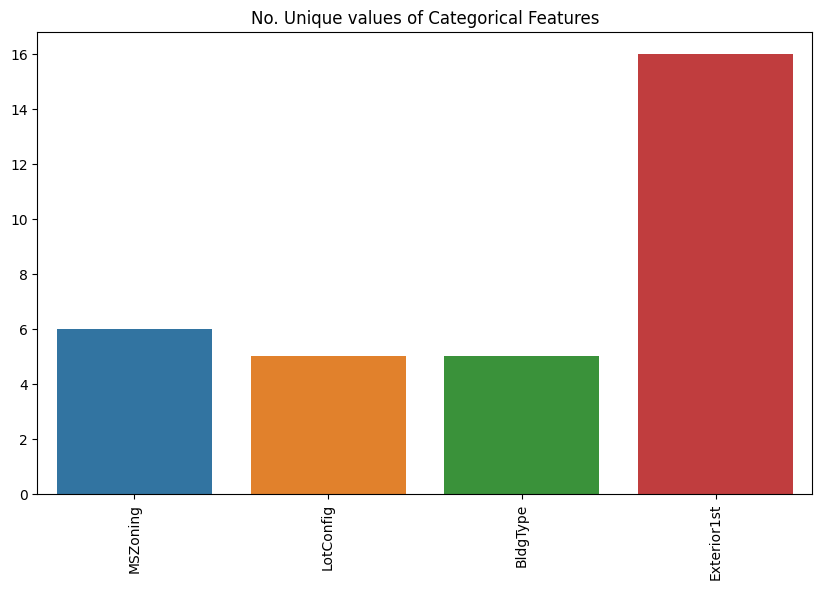

In [145]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

C:\Users\Mahaboob\AppData\Local\Temp\ipykernel_20816\2166598984.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


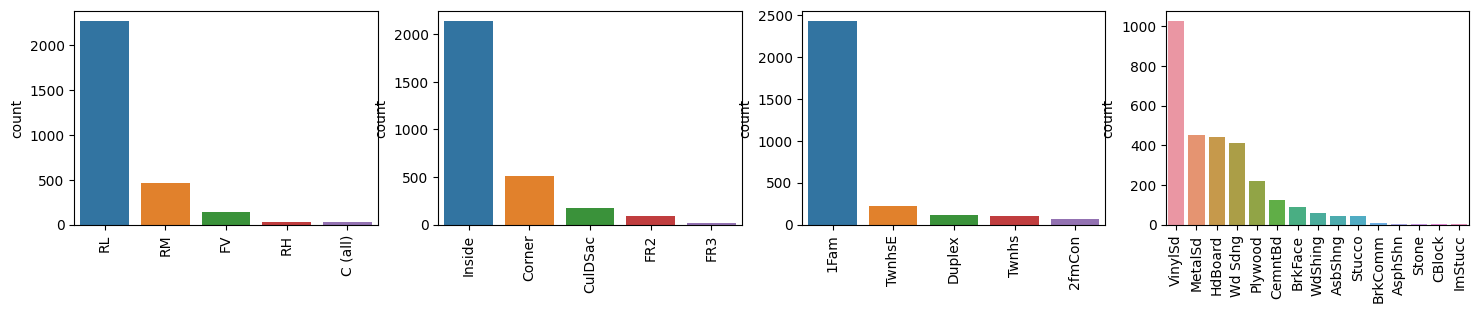

In [146]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

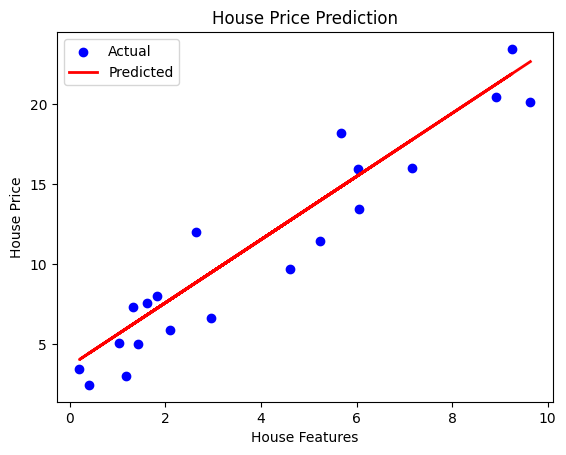

In [147]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title("House Price Prediction")
plt.xlabel("House Features")
plt.ylabel("House Price")
plt.legend()
plt.show()